# GRENOBLE ALPES METROPOLE TREES: EXPLORATION DATA ANALYSIS

<span style="color:Orange">

<span style="color:Orange">

## Imports
</span>

In [1]:
import pandas as pd
import numpy as np
import warnings

# Load data
from gamt import data_process

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
sns.set(font_scale=1.5)

plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 16

warnings.filterwarnings("ignore", "use_inf_as_na")

<span style="color:Orange">

## Loading Data
</span>

In [3]:
df = data_process.clean_trees_data('arbres_grenoble_epsg4326')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30144 entries, 0 to 31735
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sous_categorie        30144 non-null  object 
 1   code_parent           30144 non-null  object 
 2   adr_secteur           30144 non-null  int64  
 3   genre_bota            30118 non-null  object 
 4   espece                28753 non-null  object 
 5   stadededeveloppement  27860 non-null  object 
 6   anneedeplantation     30144 non-null  float64
 7   collectivite          29948 non-null  object 
 8   hauteurarbre          19995 non-null  object 
 9   structure             29924 non-null  object 
 10  latitude              30144 non-null  float64
 11  longitude             30144 non-null  float64
 12  geo_cluster           30144 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 3.1+ MB


In [5]:
# Numerical Features
num_attributes = df.select_dtypes(exclude='object')

describe = num_attributes.describe().T
describe['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describe['variation coefficient'] = (num_attributes.std() / num_attributes.mean()).tolist()
describe['skew'] = num_attributes.skew().tolist()
describe['kurtosis'] = num_attributes.kurtosis().tolist()

describe

count         mean        std          min          25%  \
adr_secteur        30144.0     3.828722   1.706830     1.000000     2.000000   
anneedeplantation  30144.0  1990.018644  17.992314  1900.000000  1975.000000   
latitude           30144.0    45.177280   0.011999    45.151572    45.166299   
longitude          30144.0     5.727445   0.012782     5.697915     5.717668   
geo_cluster        30144.0     5.896198   3.716348     0.000000     3.000000   

                           50%          75%          max       range  \
adr_secteur           4.000000     5.000000     6.000000    5.000000   
anneedeplantation  1987.000000  2006.000000  2022.000000  122.000000   
latitude             45.175925    45.187461    45.224825    0.073253   
longitude             5.729491     5.737417     5.798704    0.100789   
geo_cluster           6.000000     9.000000    13.000000   13.000000   

                   variation coefficient      skew  kurtosis  
adr_secteur                     0.445796 -0.188353 -1.340525  
anneedeplantation               0.009041 -0.066906 -0.455340  
latitude                        0.000266  0.260644 -0.851916  
longitude                       0.002232 -0.158774  0.034749  
geo_cluster                     0.630296  0.258161 -1.043746

In [6]:
df['adr_secteur'] = df['adr_secteur'].astype('object')
df['geo_cluster'] = df['geo_cluster'].astype('object')

In [7]:
# Categorical Features
cat_attributes = df.select_dtypes(include='object')

cat_attributes.describe().T

count unique                    top   freq
sous_categorie        30144      4                 ESP174  14724
code_parent           30144   1173                 Others    890
adr_secteur           30144      6                      6   6716
genre_bota            30118     91                   Acer   4966
espece                28753    192             acerifolia   3739
stadededeveloppement  27860      3           Arbre adulte  21007
collectivite          29948      2      Ville de Grenoble  15397
hauteurarbre          19995      3         de 10 m à 20 m   9132
structure             29924      4  Métropole de Grenoble  14520
geo_cluster           30144     14                      7   3662

<span style="color:Orange">

## Univariate Analysis
</span>

**Target**

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Distribution of Year of Plantation')

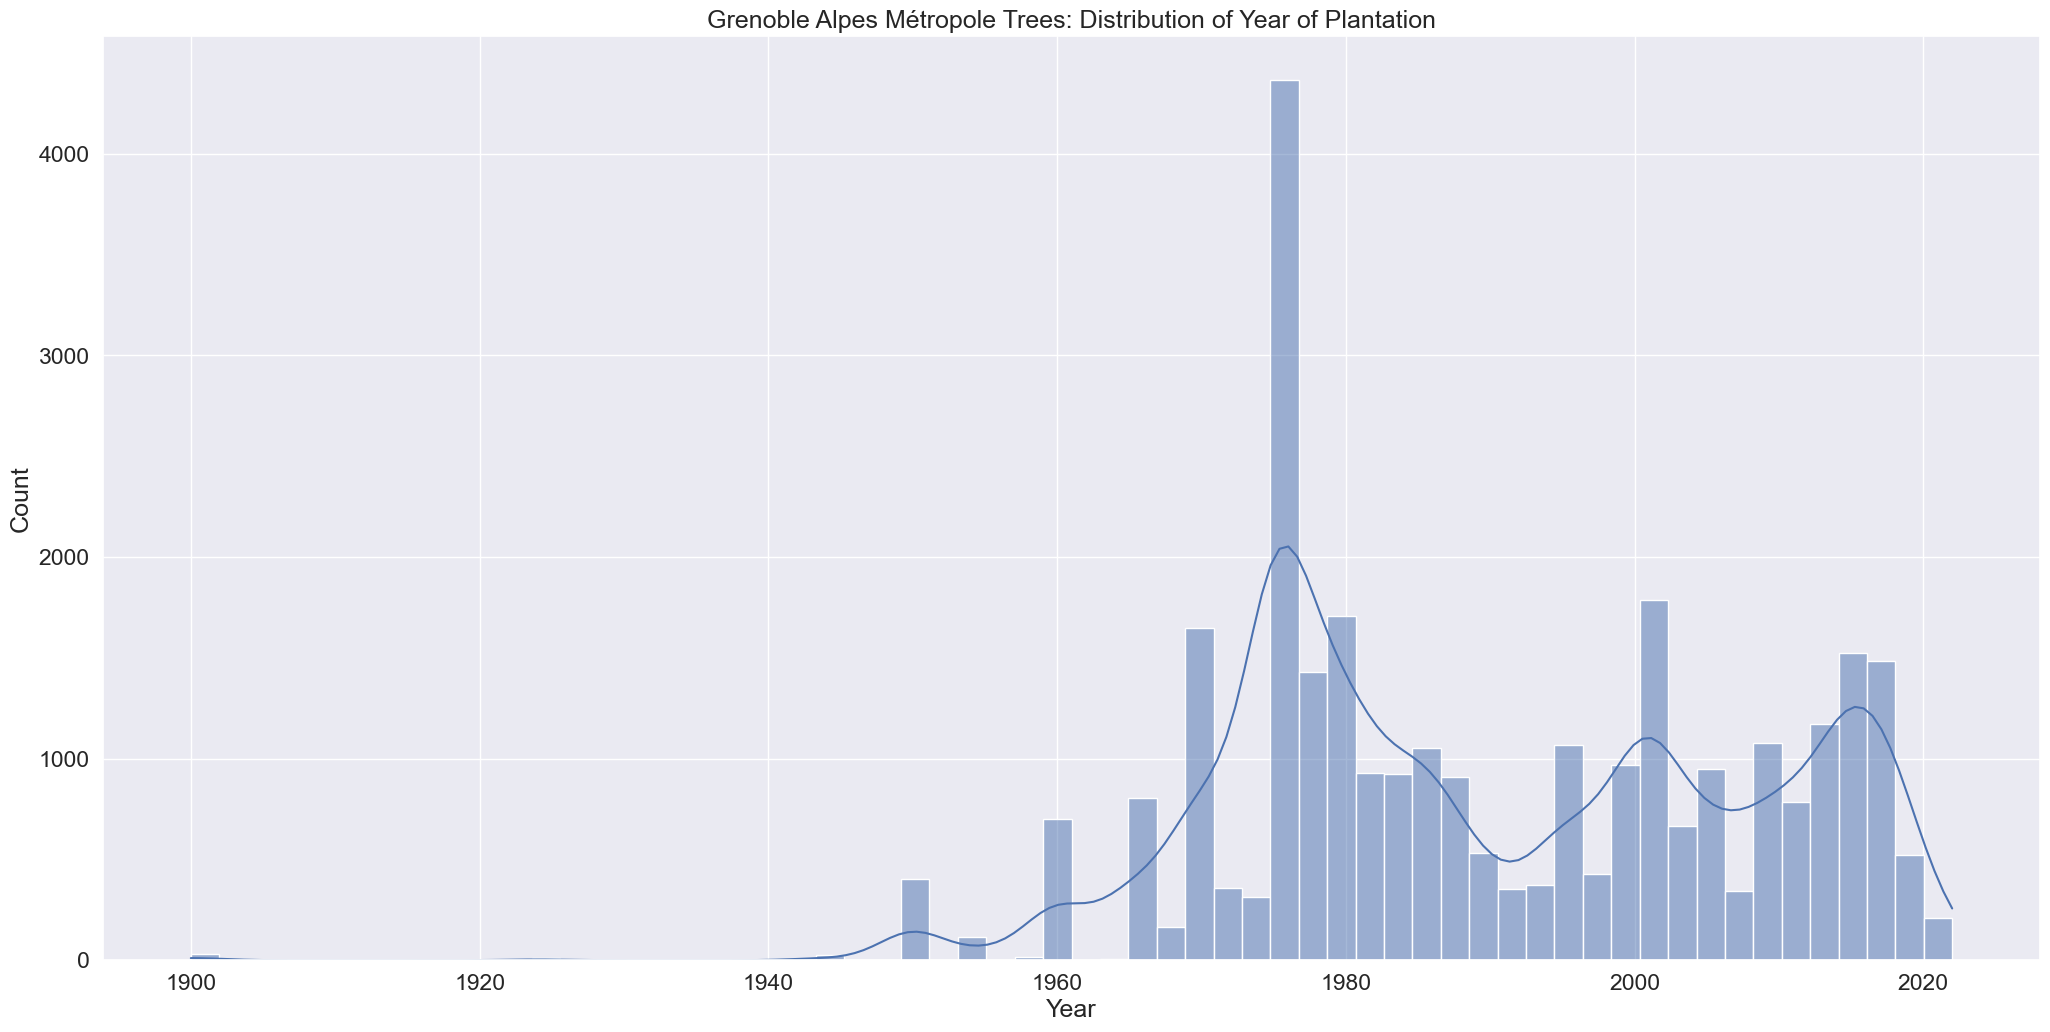

In [8]:
ax = sns.histplot(df['anneedeplantation'], kde=True)
ax.set_xlabel("Year")
ax.set_title("Grenoble Alpes Métropole Trees: Distribution of Year of Plantation")

**Features**

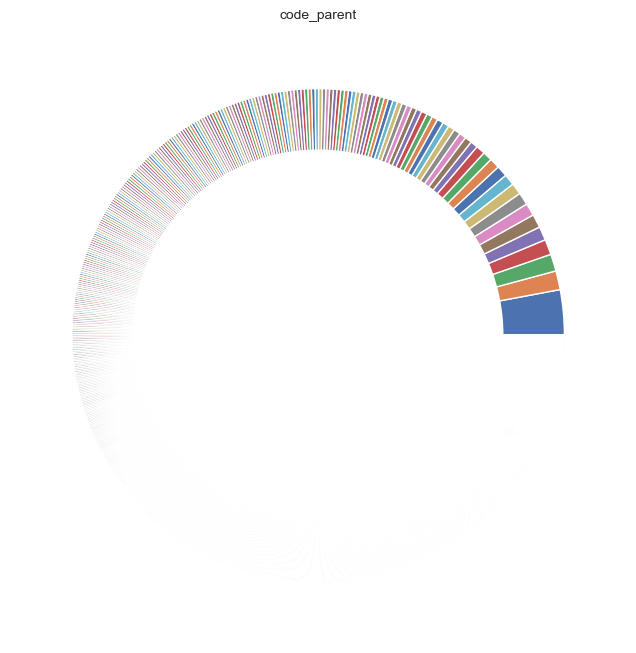

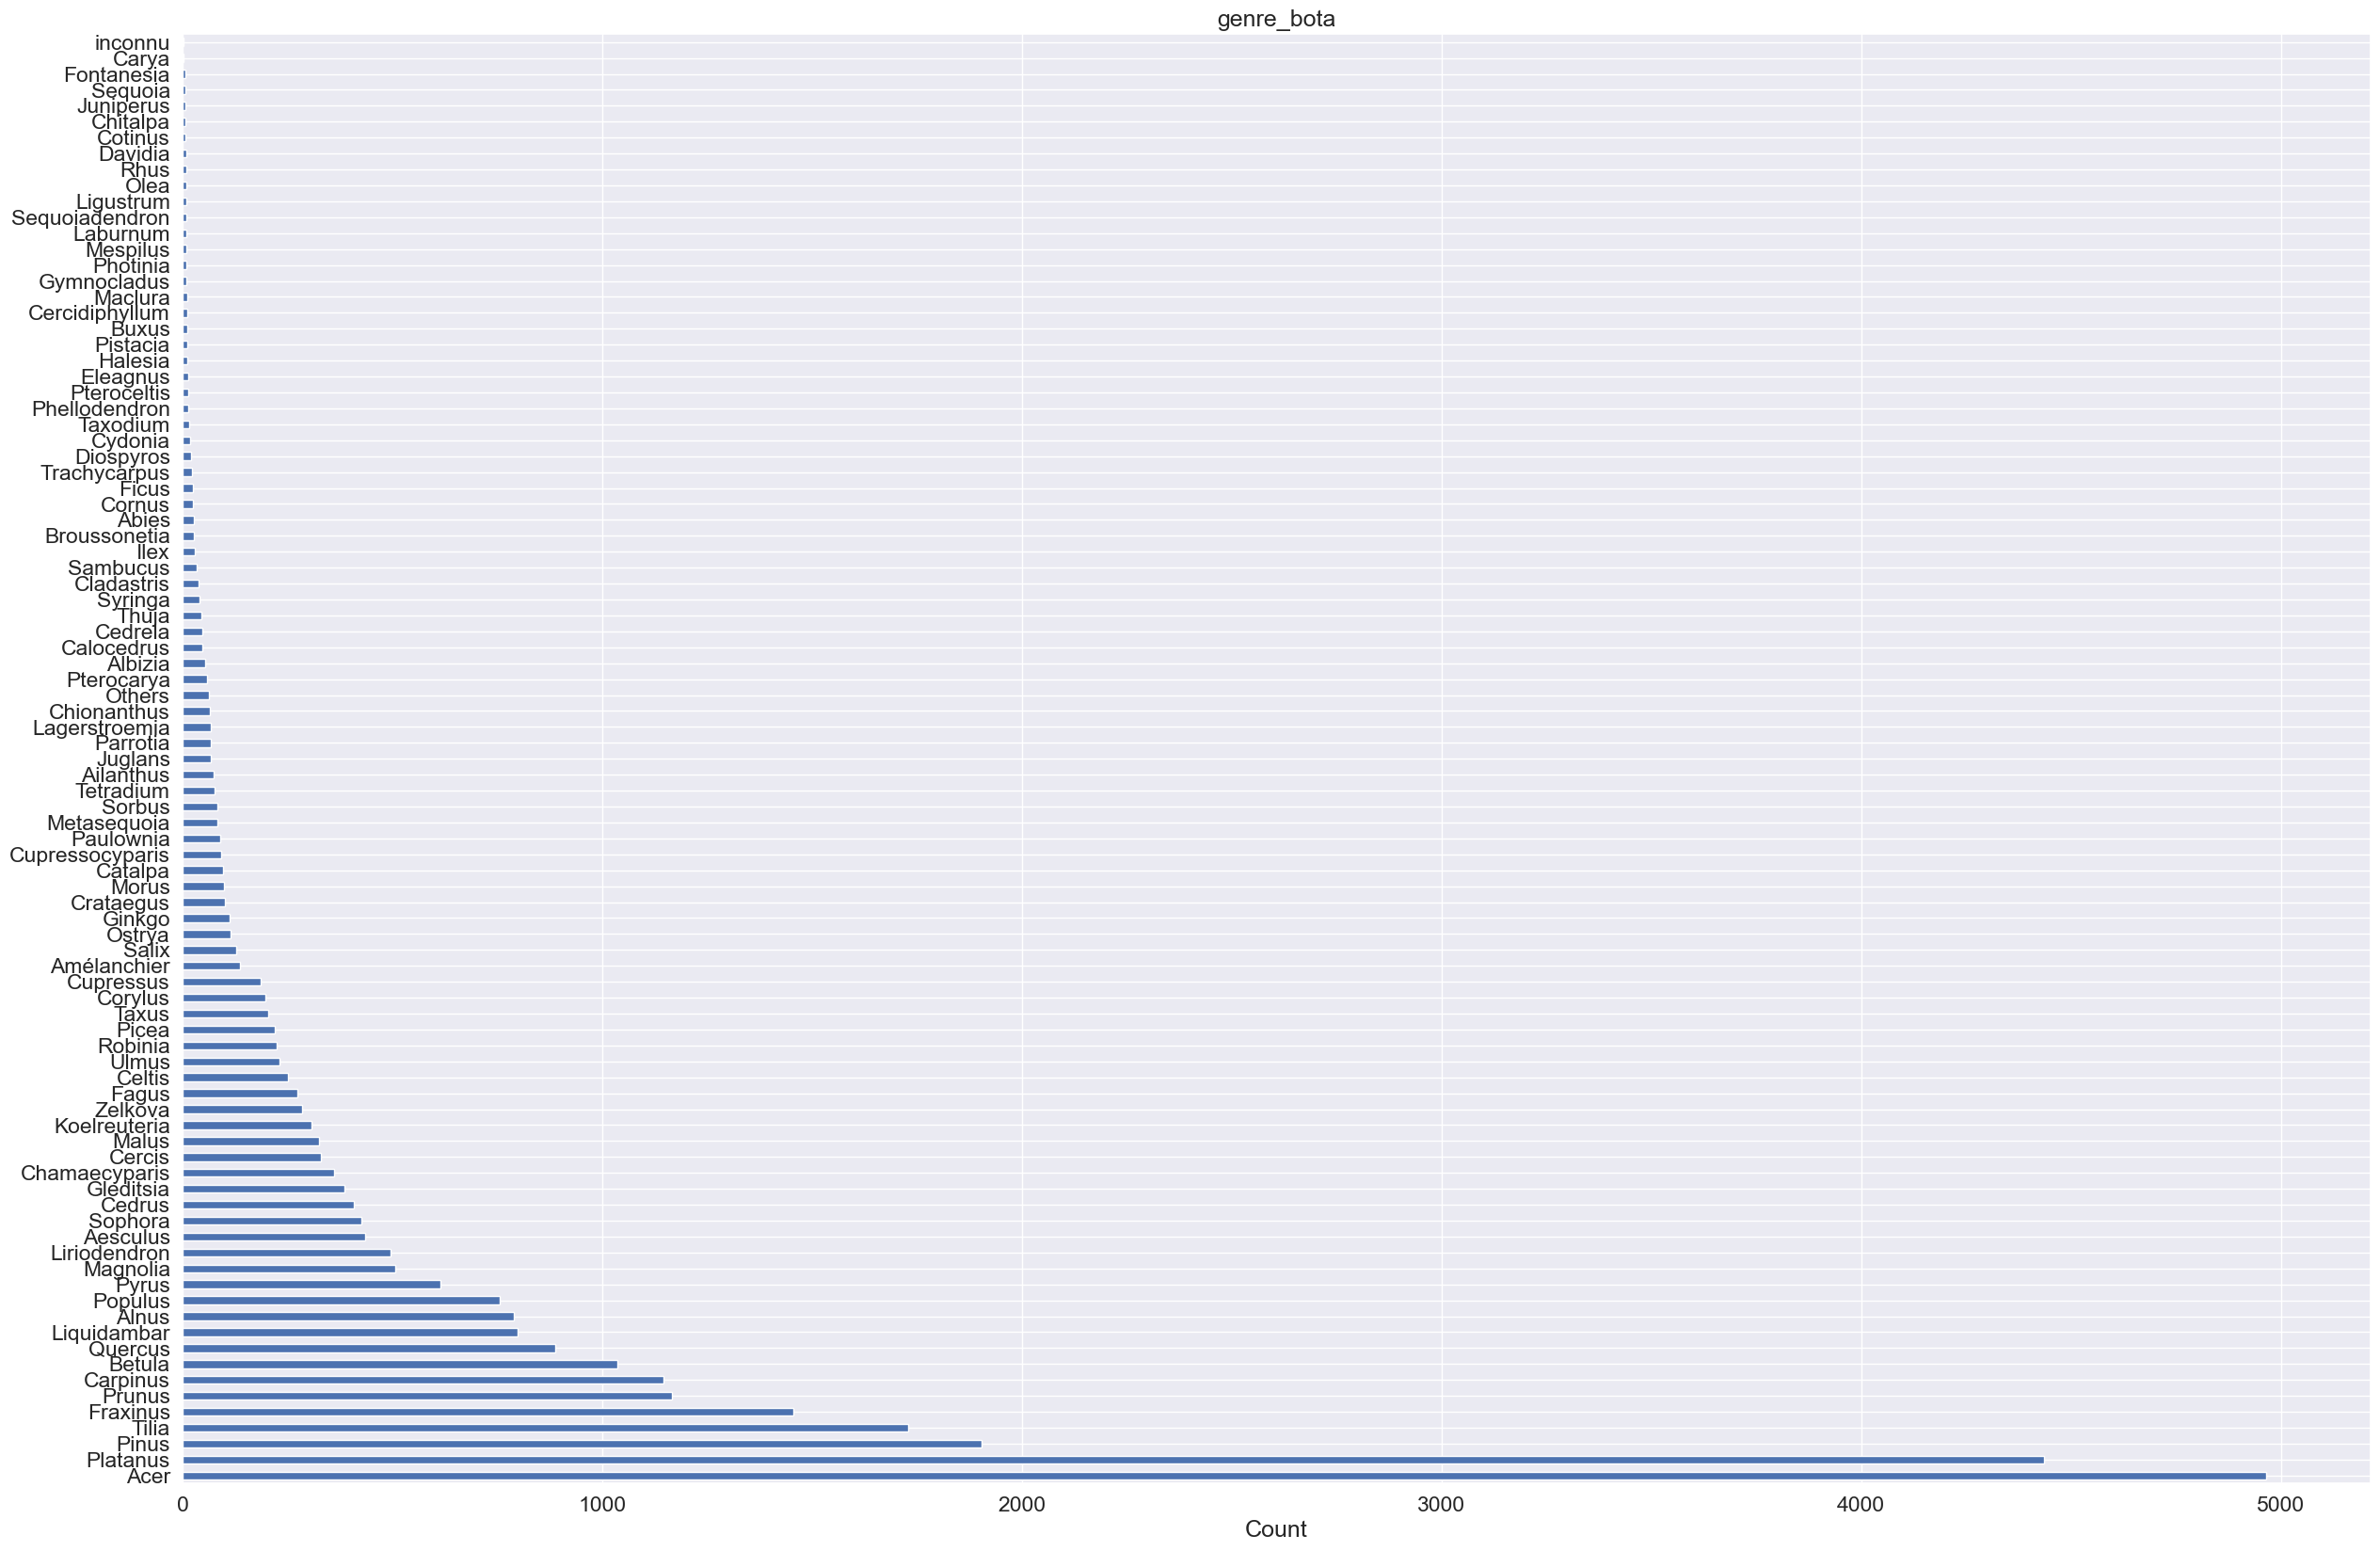

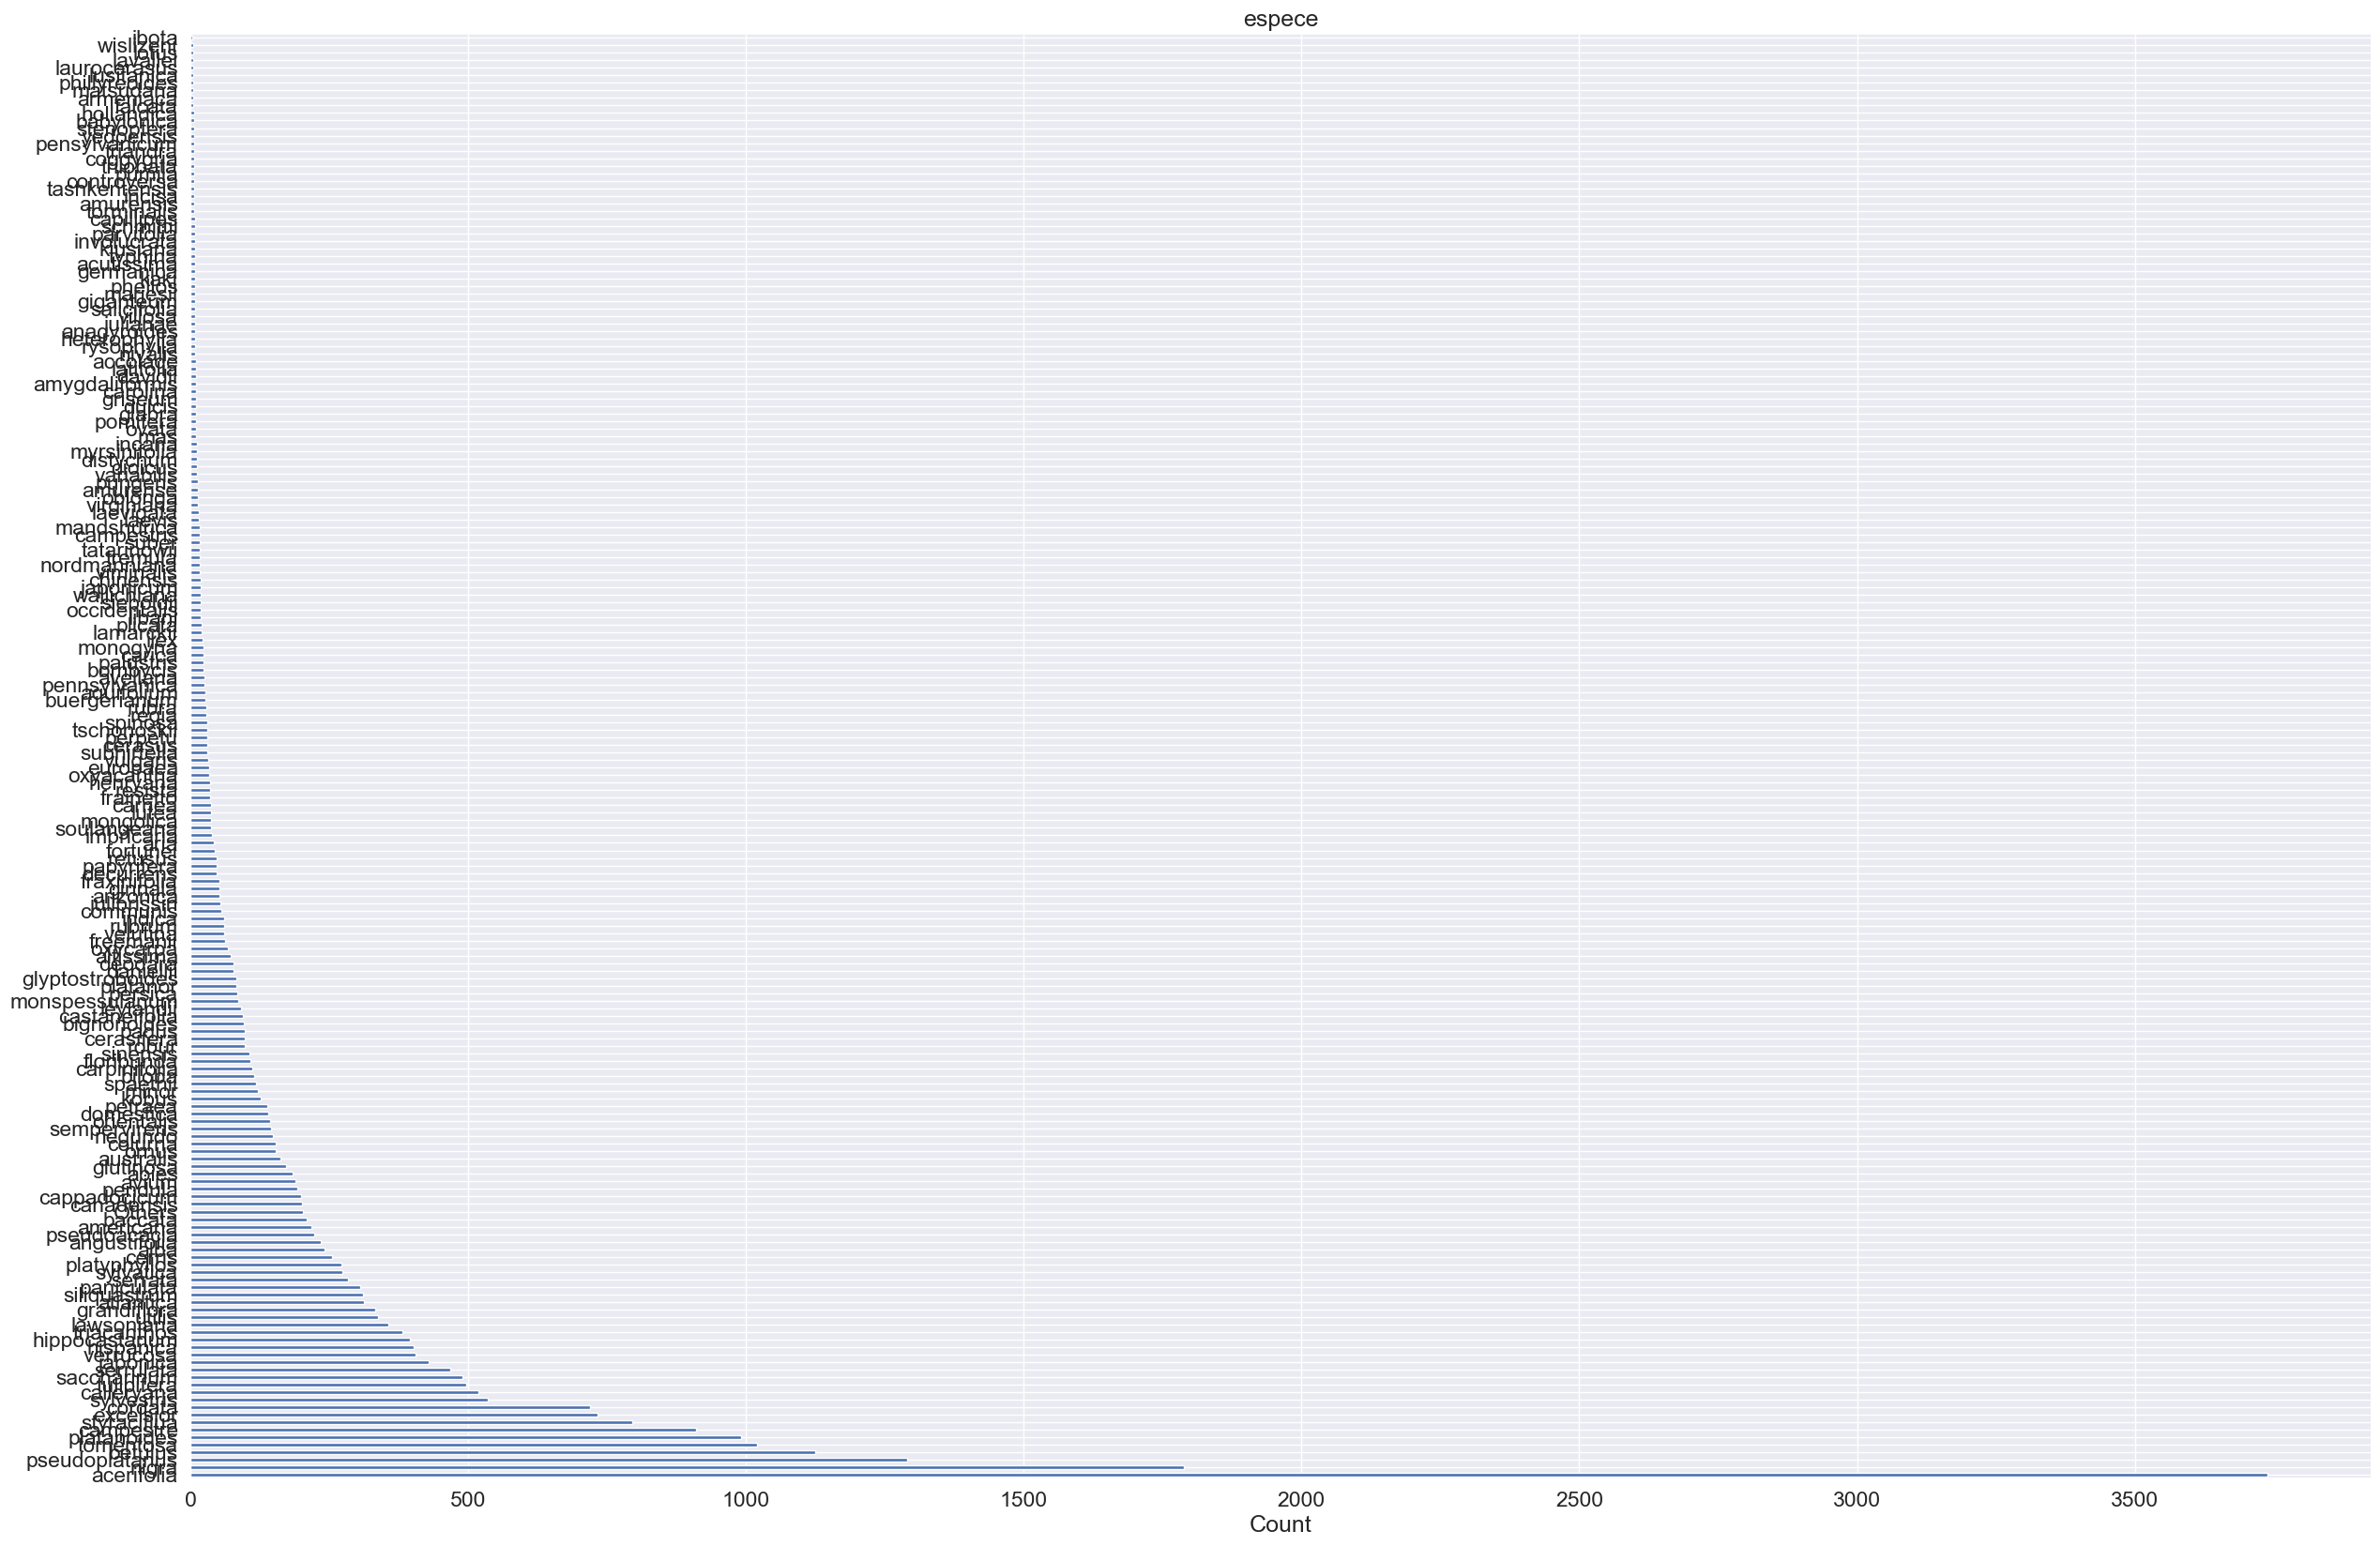

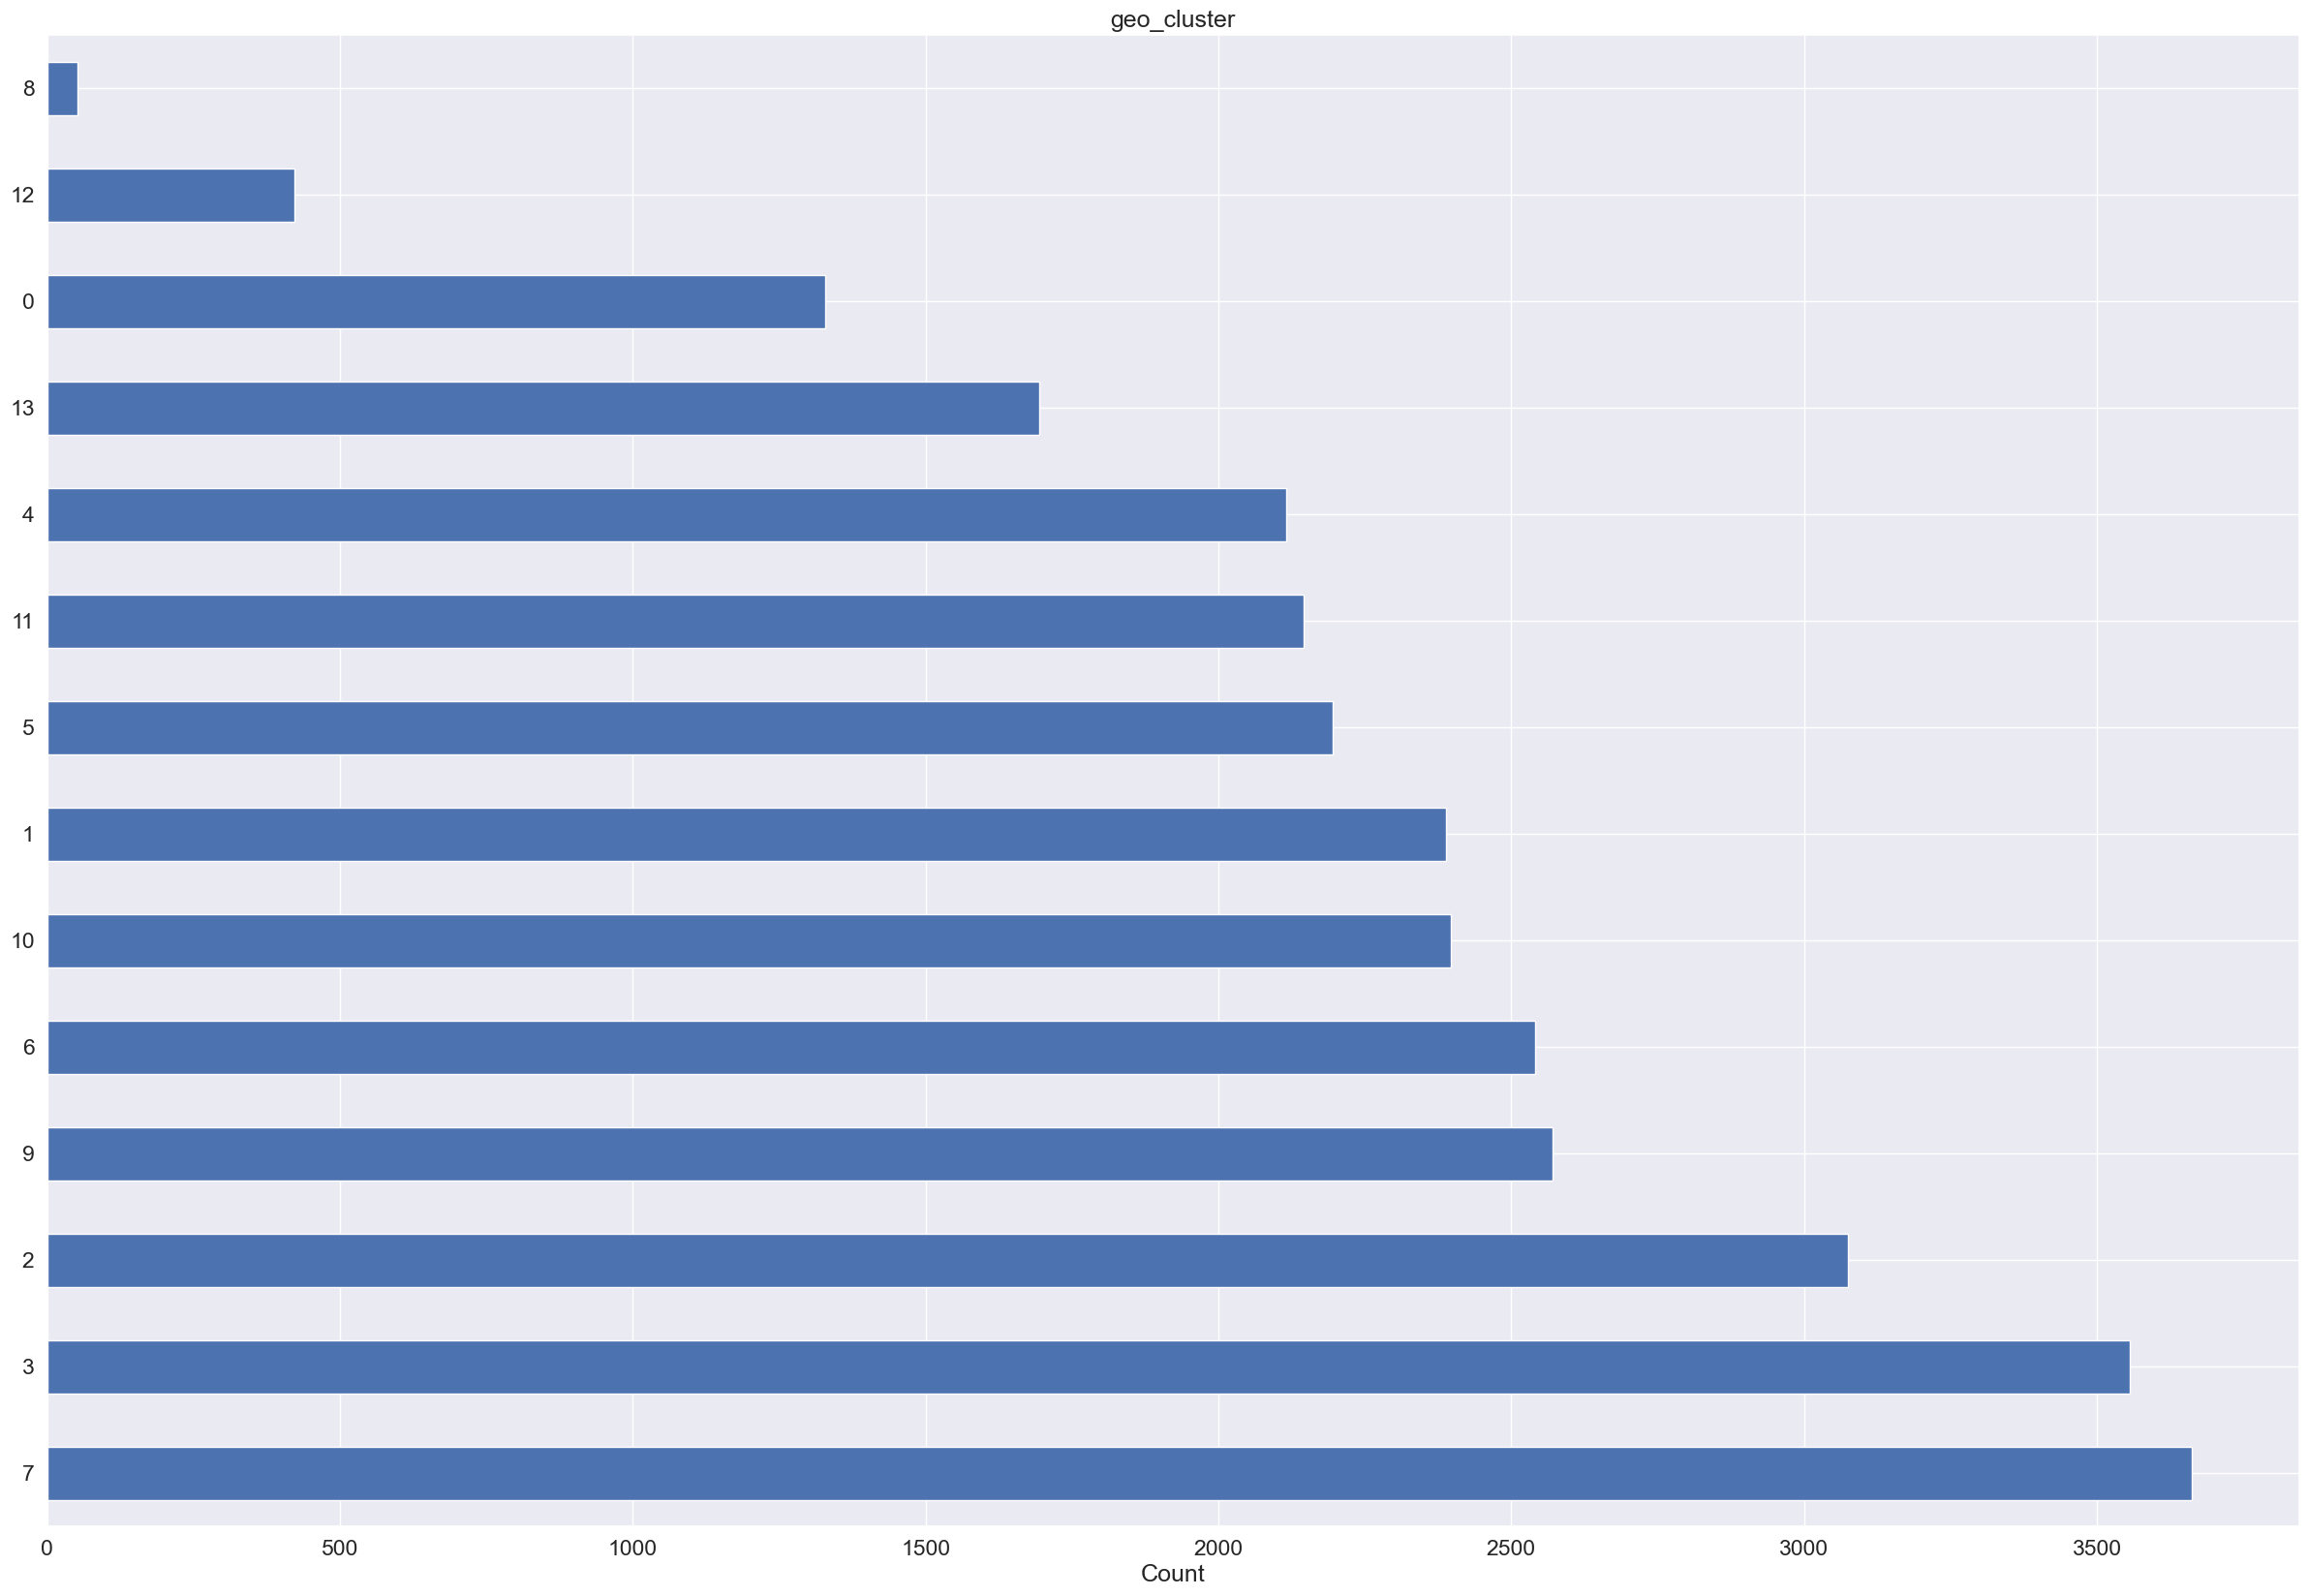

In [9]:
features = cat_attributes.columns.tolist()

features0 = []
features1 = []
features2 = []
for column in cat_attributes.columns:
    if (cat_attributes[column].nunique() > 200):
        plt.figure(figsize=(8,8))
        plt.pie(df[column].value_counts())
        plt.title(column, size=10)
        circle=plt.Circle( (0,0), 0.75, color='white')
        p=plt.gcf()
        p.gca().add_artist(circle)

        plt.show()
    elif (cat_attributes[column].nunique() <= 200) and (cat_attributes[column].nunique() > 8):
        features1.append(column)
    else:
        features2.append(column)

for column in features1:
    plt.figure(figsize=(30,20))
    ax = df[column].value_counts().plot(kind = 'barh')
    ax.set_xlabel("Count")
    ax.set_ylabel("")
    ax.set_title(column)
    plt.plot()

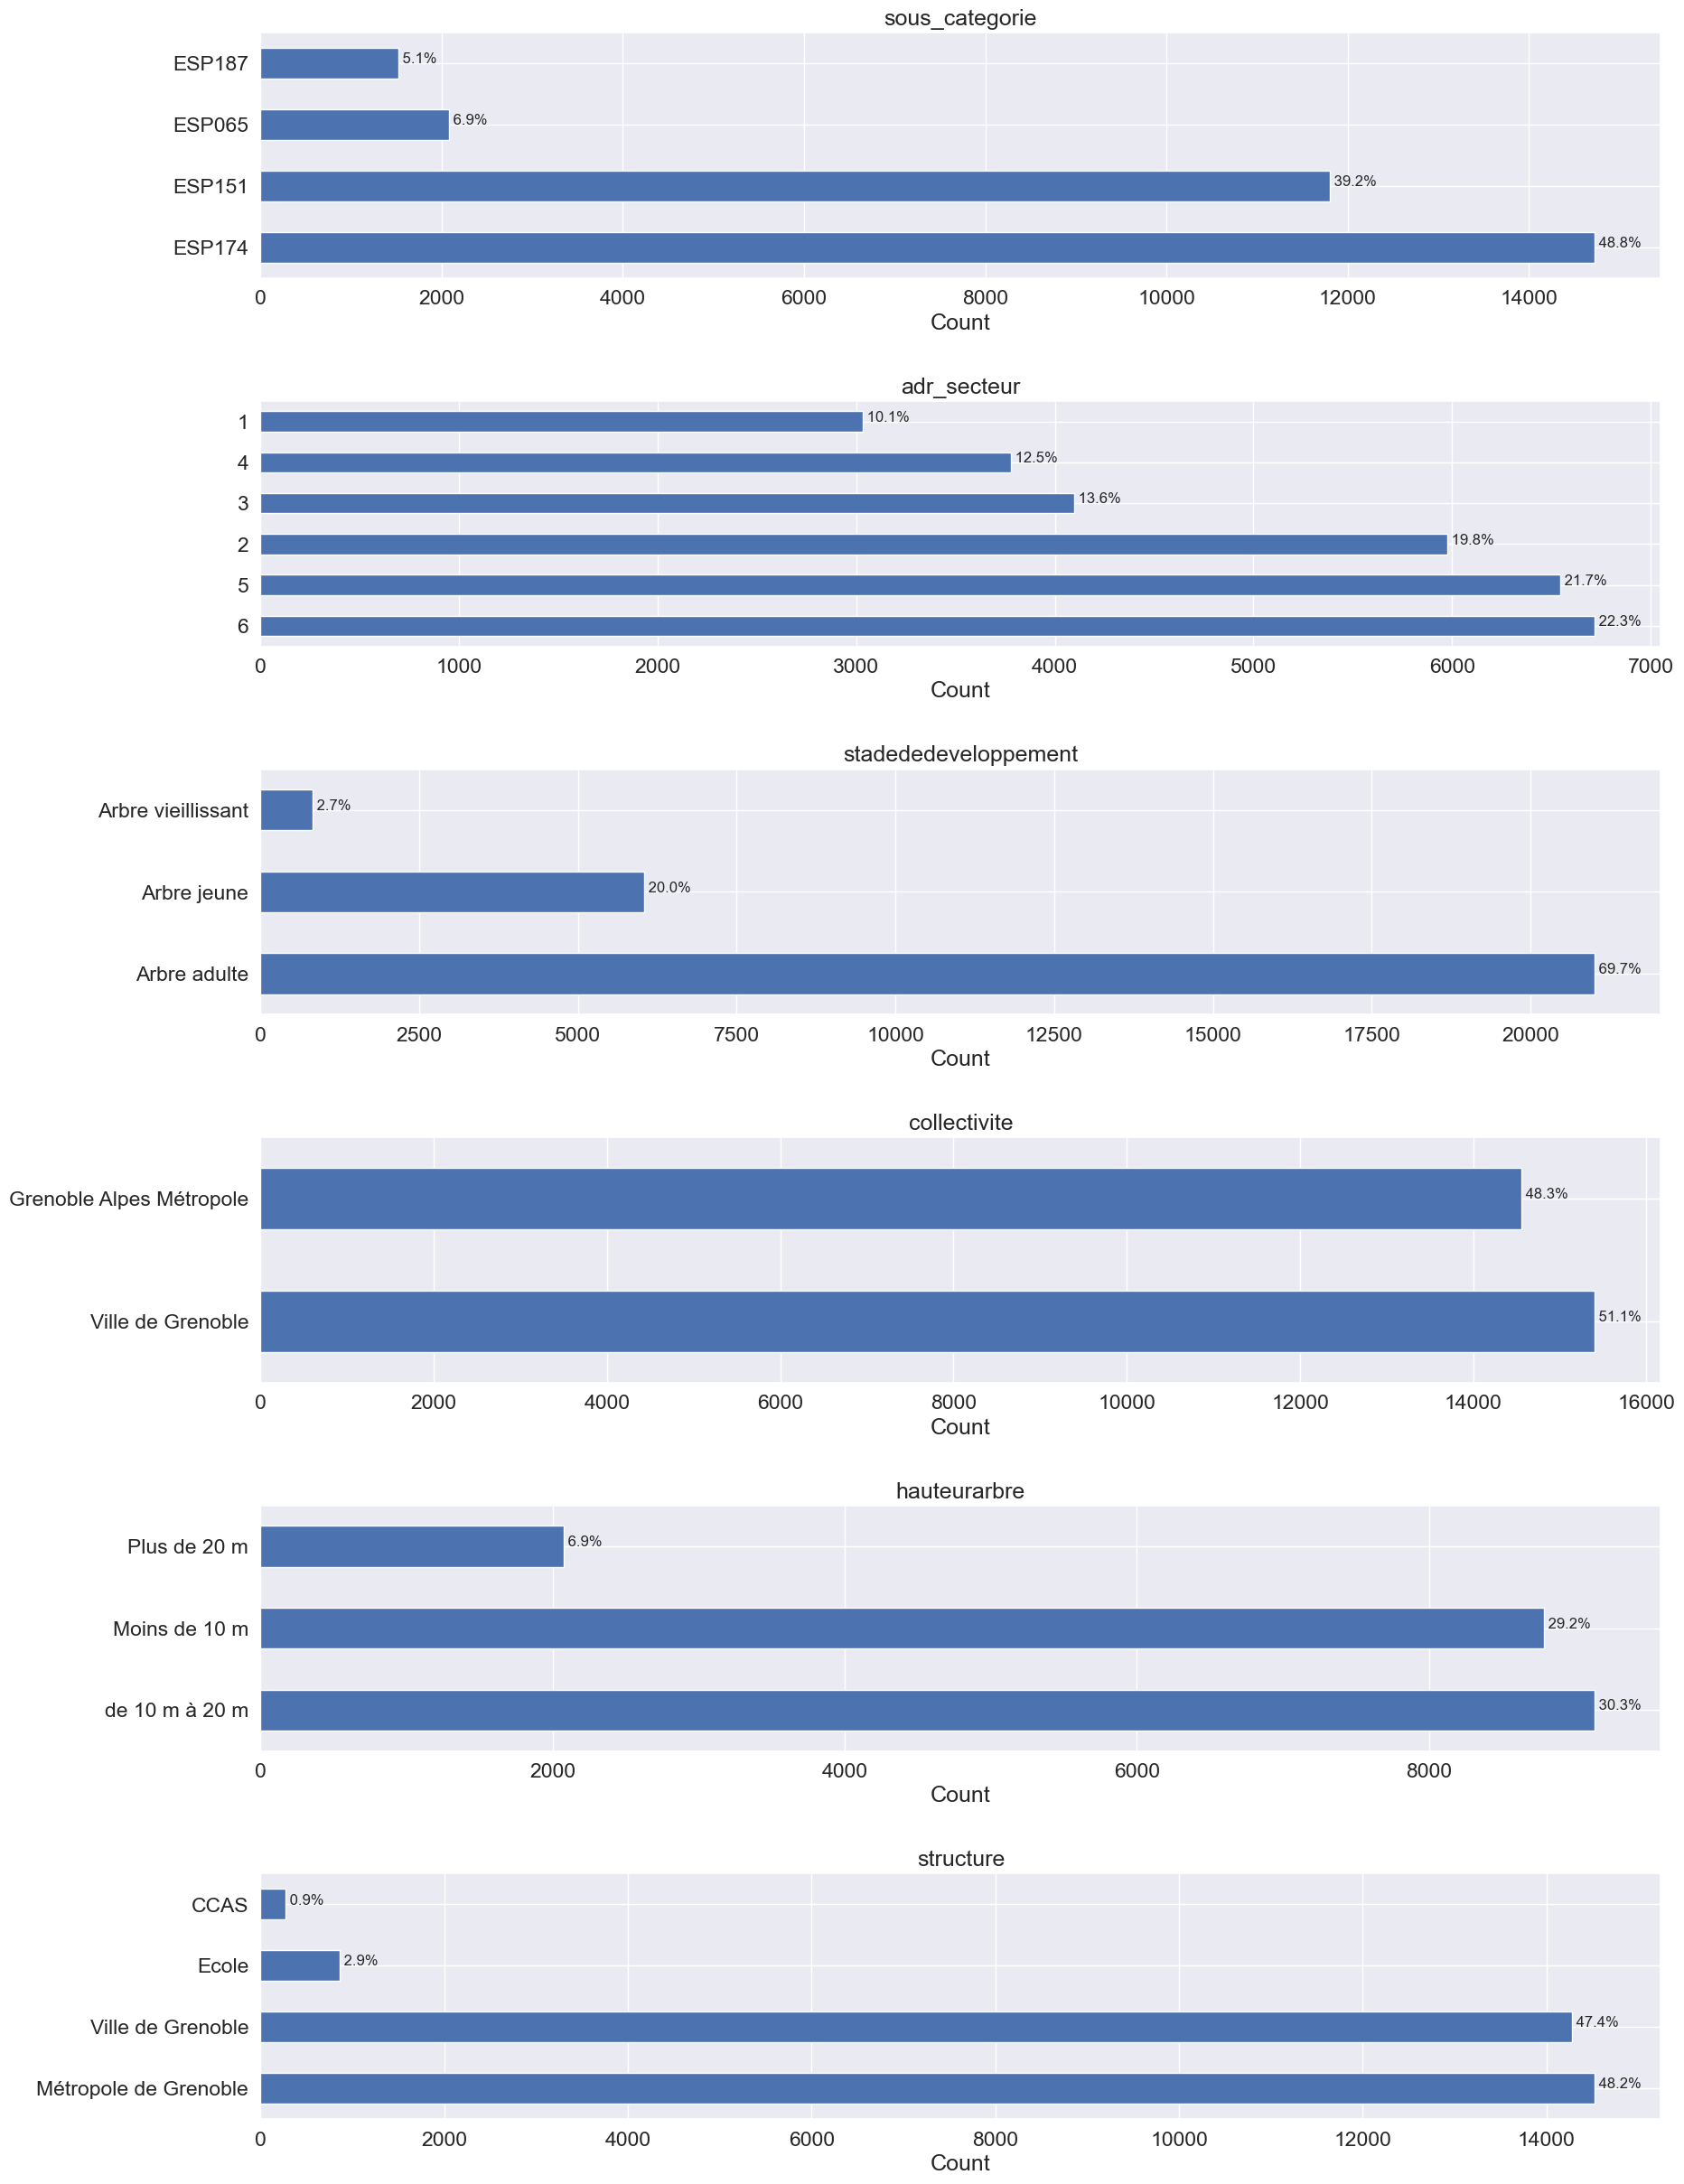

In [10]:

fig = plt.figure(figsize=(20, 30))
j = 1
for column in features2:
    plt.subplot(int(np.ceil(len(features2))), 1, j)
    plt.subplots_adjust(hspace=0.5)
    ax = df[column].value_counts().plot(kind = 'barh')
    ax.set_xlabel("Count")
    ax.set_ylabel("")
    ax.set_title(column)
   
    total = cat_attributes[column].size
    for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), size=12)
    
    j += 1

plt.show()

<span style="color:Orange">

## Bivariate Analysis
</span>

In [11]:
fig = px.scatter(df, x='longitude', y='latitude', color='anneedeplantation', 
    title='Grenoble Alpes Métropole Trees: Year of Plantation and Geolocation',
    width=800, height=700
)
fig.show()

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by Area')

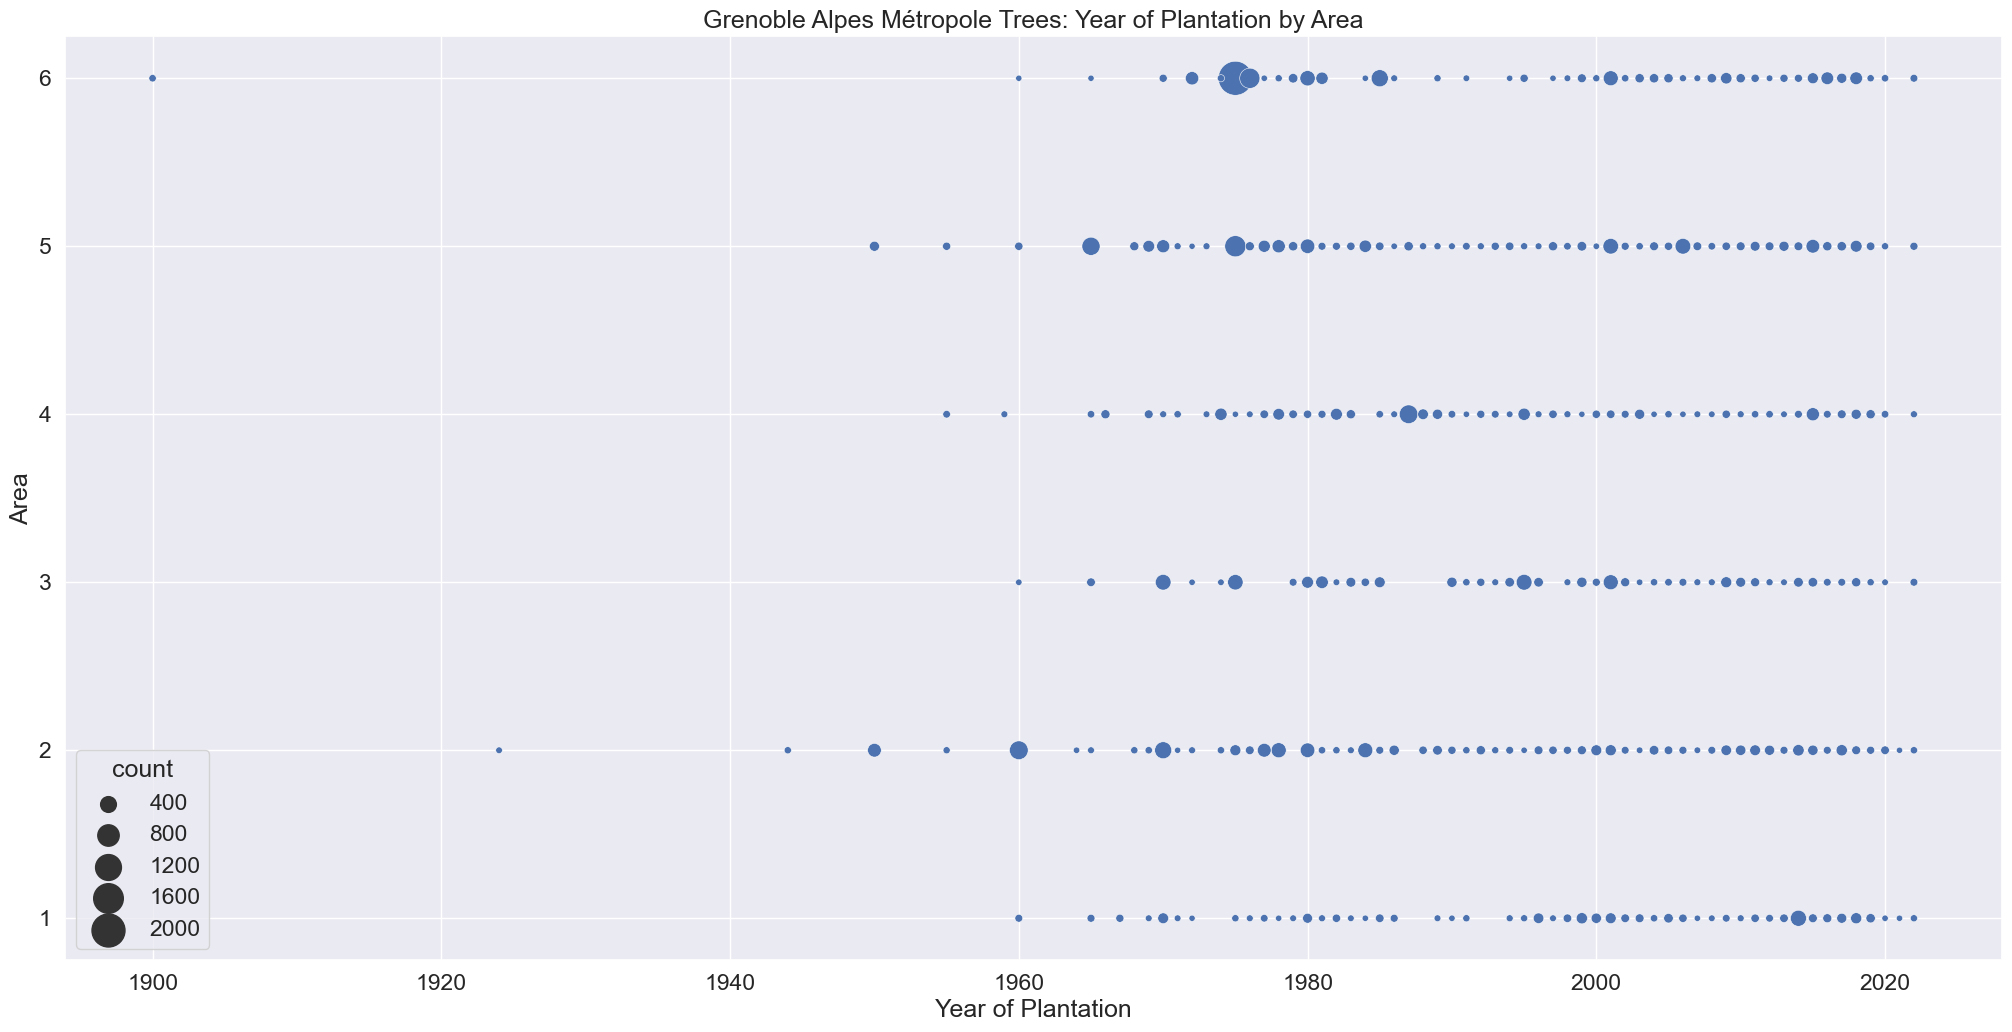

In [12]:
df_plot = df[['anneedeplantation', 'adr_secteur']].value_counts().reset_index()
ax = sns.scatterplot(data=df_plot, 
                x="anneedeplantation", 
                y="adr_secteur", 
                size="count", sizes=(20,600))
ax.set_xlabel("Year of Plantation")
ax.set_ylabel("Area")
ax.set_title("Grenoble Alpes Métropole Trees: Year of Plantation by Area")

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by Geolocation Cluster')

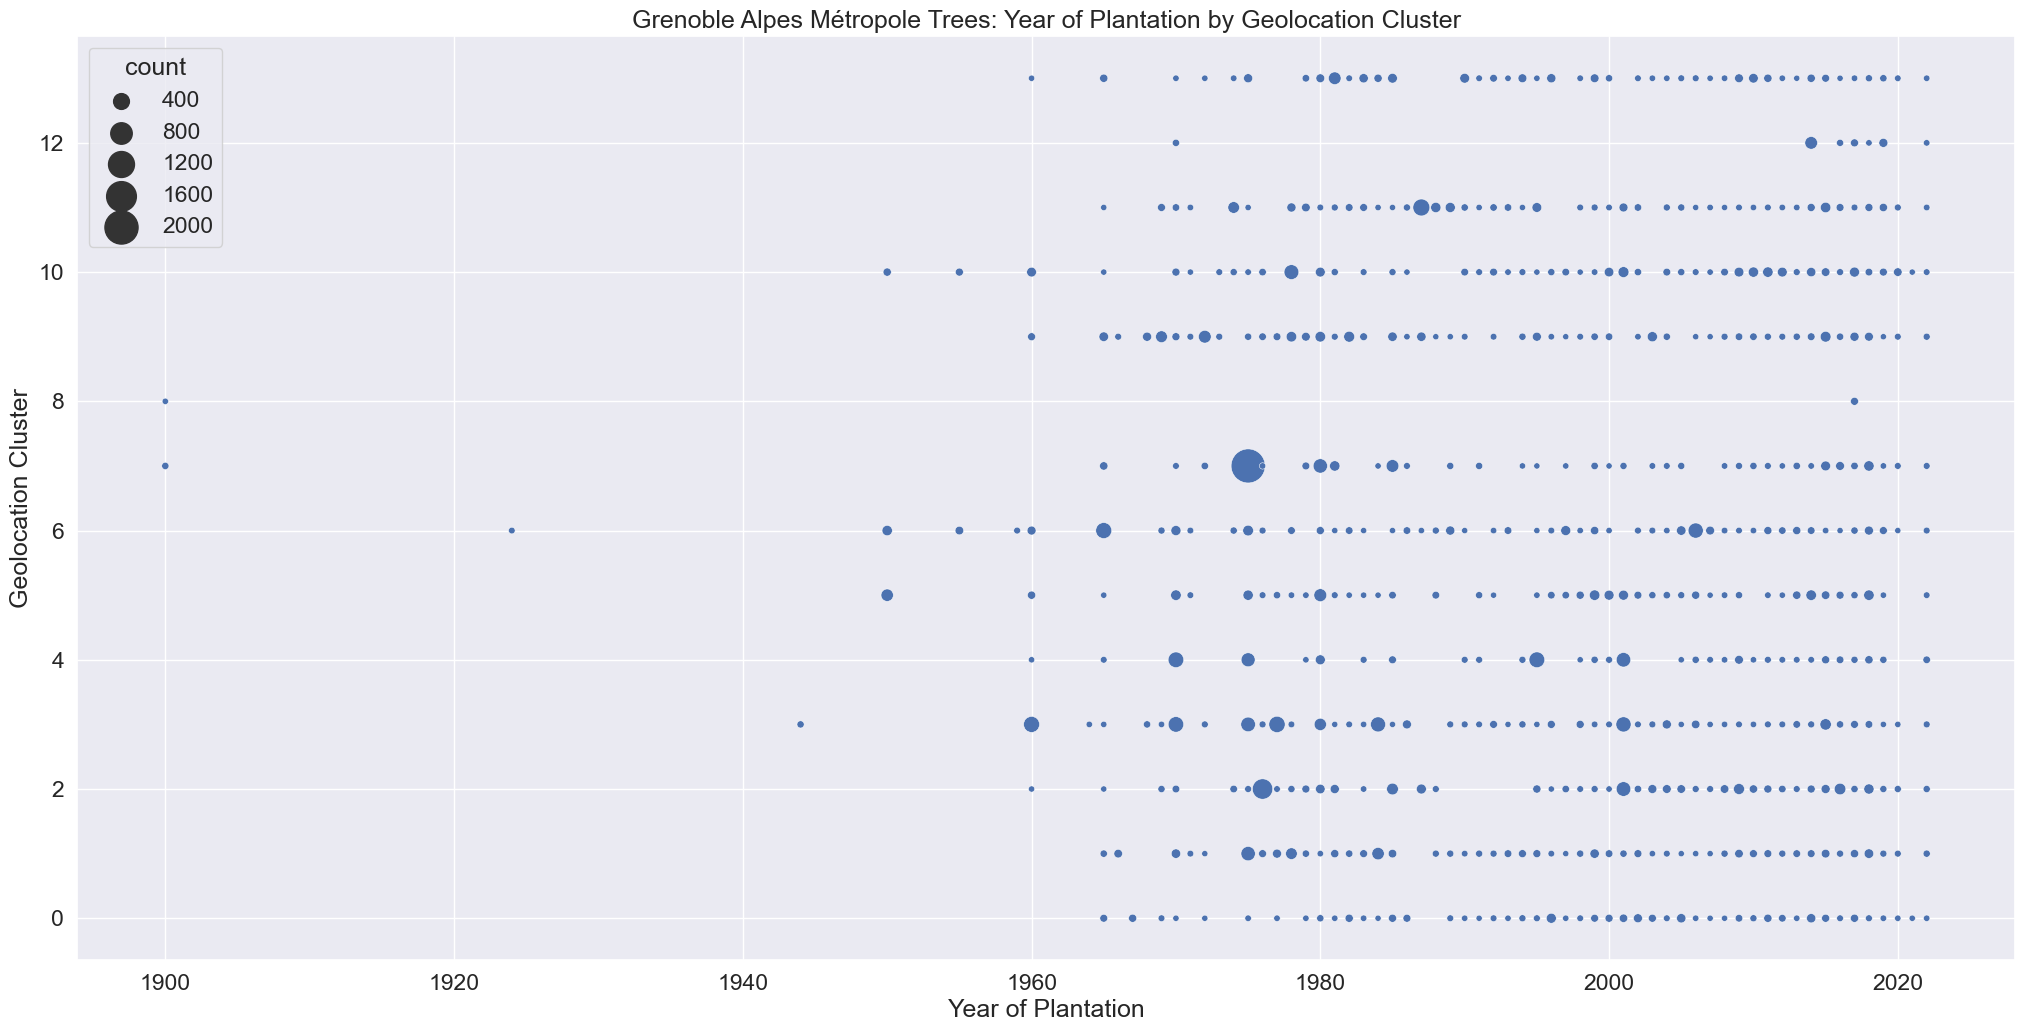

In [13]:
df_plot = df[['anneedeplantation', 'geo_cluster']].value_counts().reset_index()
ax = sns.scatterplot(data=df_plot, 
                x="anneedeplantation", 
                y="geo_cluster", 
                size="count", sizes=(20,600))
ax.set_xlabel("Year of Plantation")
ax.set_ylabel("Geolocation Cluster")
ax.set_title("Grenoble Alpes Métropole Trees: Year of Plantation by Geolocation Cluster")

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by Species')

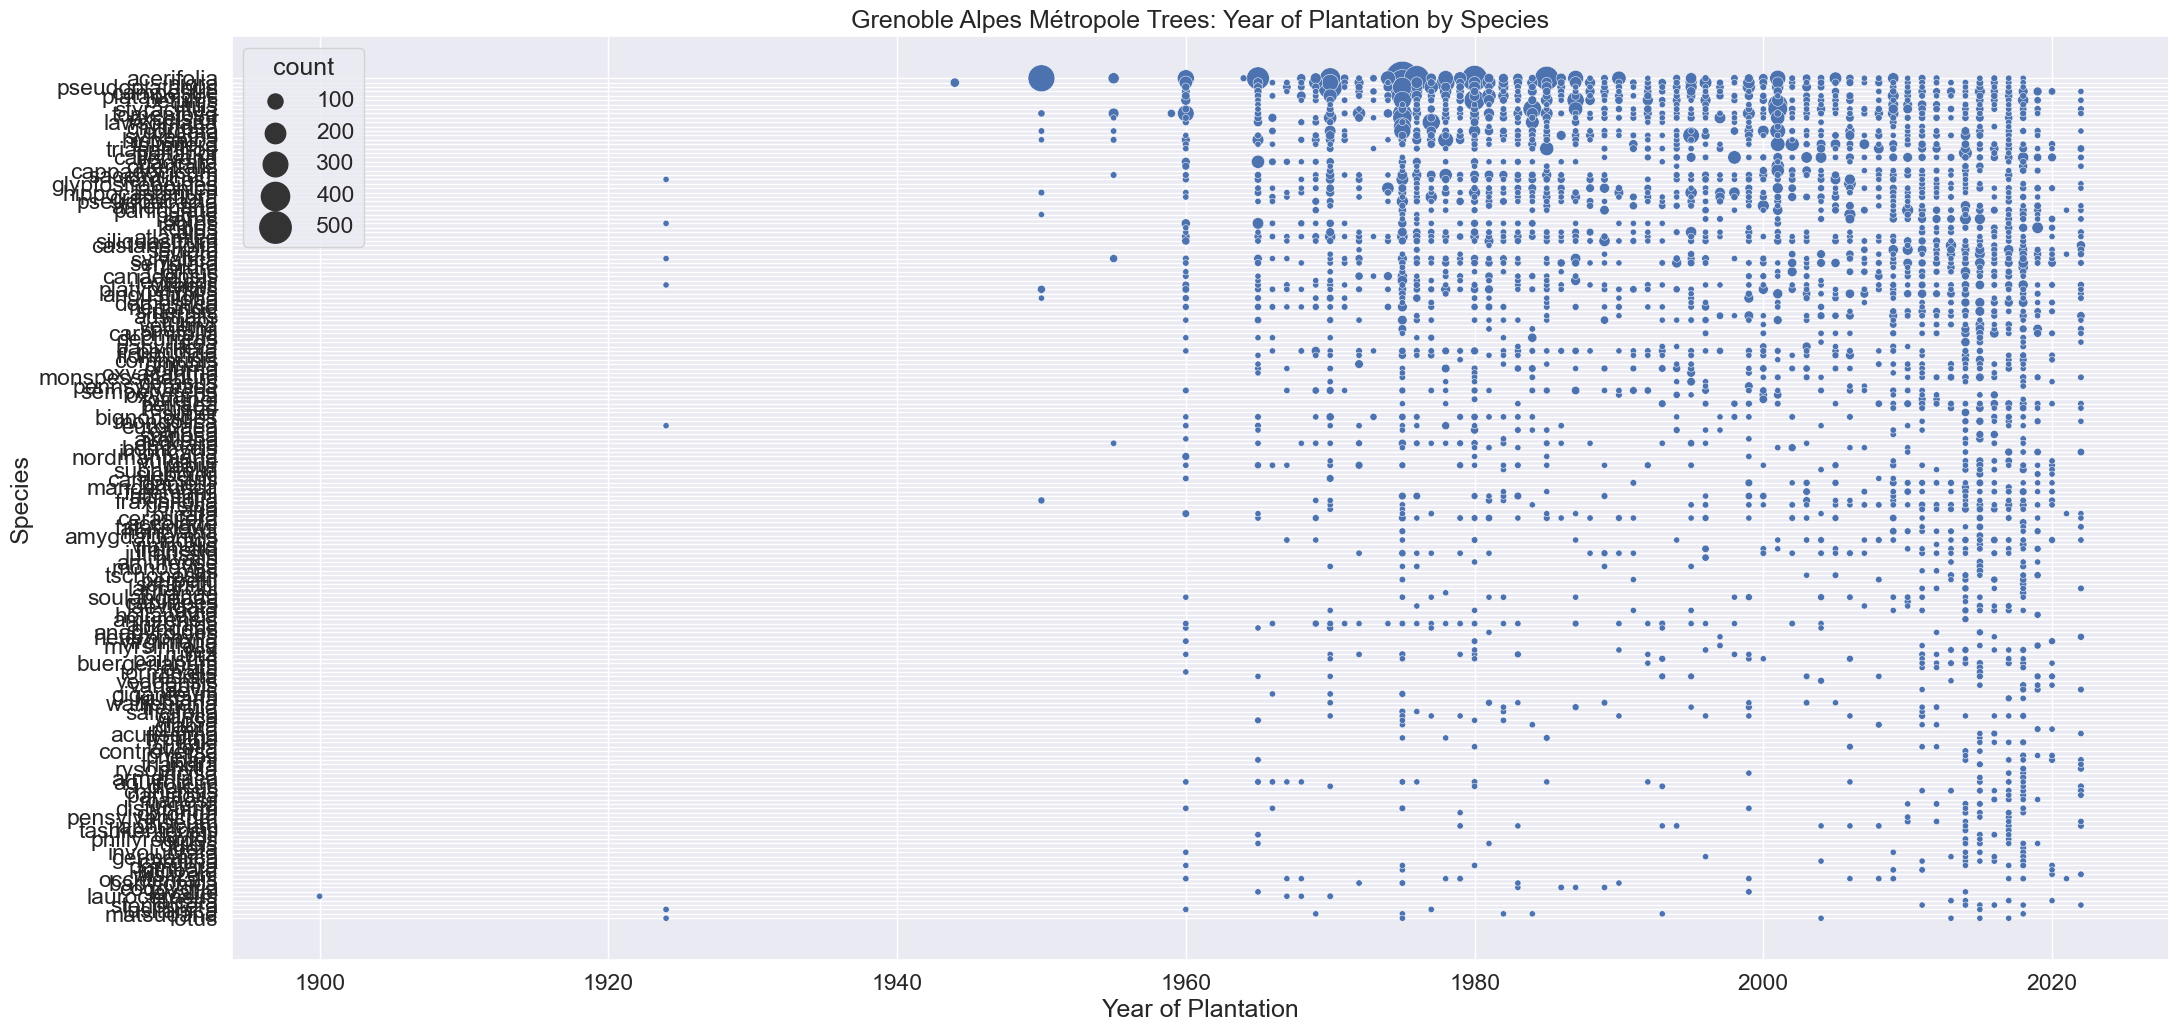

In [14]:
df_plot = df[['anneedeplantation', 'espece']].value_counts().reset_index()
ax = sns.scatterplot(data=df_plot, 
                x="anneedeplantation", 
                y="espece", 
                size="count", sizes=(20,600))
ax.set_xlabel("Year of Plantation")
ax.set_ylabel("Species")
ax.set_title("Grenoble Alpes Métropole Trees: Year of Plantation by Species")

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by Botanical Genus')

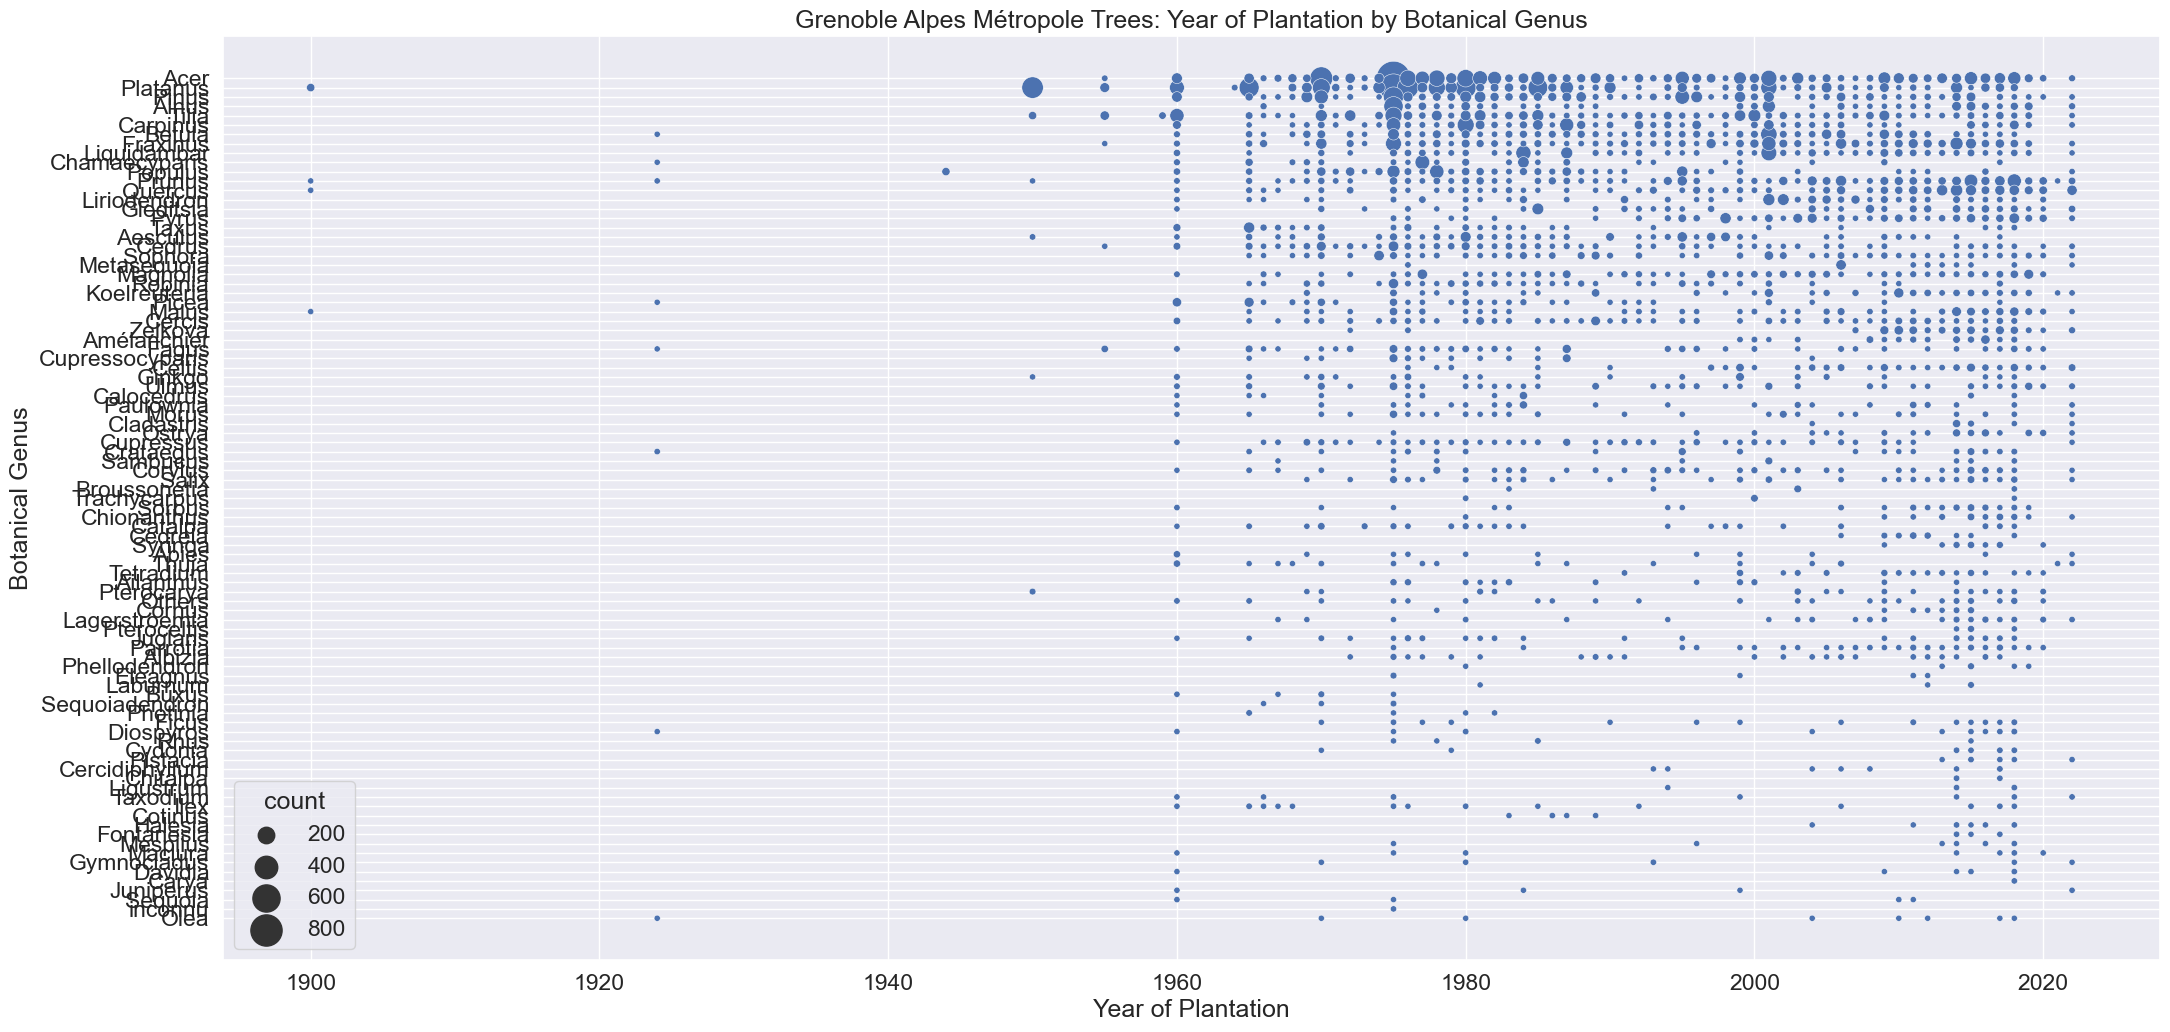

In [15]:
df_plot = df[['anneedeplantation', 'genre_bota']].value_counts().reset_index()
ax = sns.scatterplot(data=df_plot, 
                x="anneedeplantation", 
                y="genre_bota", 
                size="count", sizes=(20,600))
ax.set_xlabel("Year of Plantation")
ax.set_ylabel("Botanical Genus")
ax.set_title("Grenoble Alpes Métropole Trees: Year of Plantation by Botanical Genus")

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by Sub-Category')

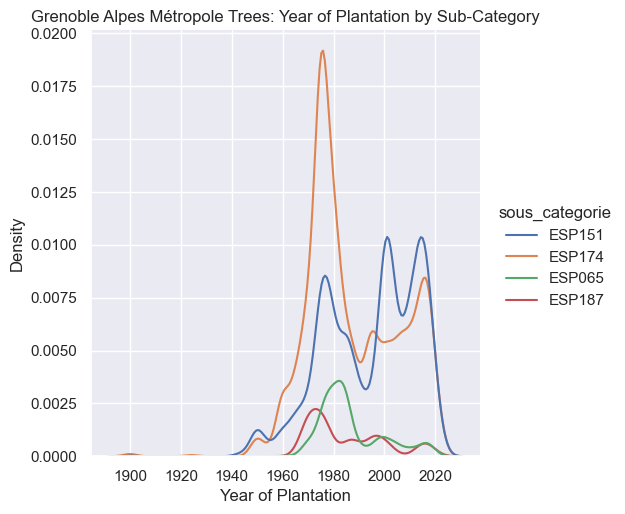

In [16]:

sns.set(font_scale=1)

plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 8

sns.displot(data=df, kind="kde", x="anneedeplantation", hue="sous_categorie")
plt.xlabel("Year of Plantation")
plt.title("Grenoble Alpes Métropole Trees: Year of Plantation by Sub-Category")

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by Community')

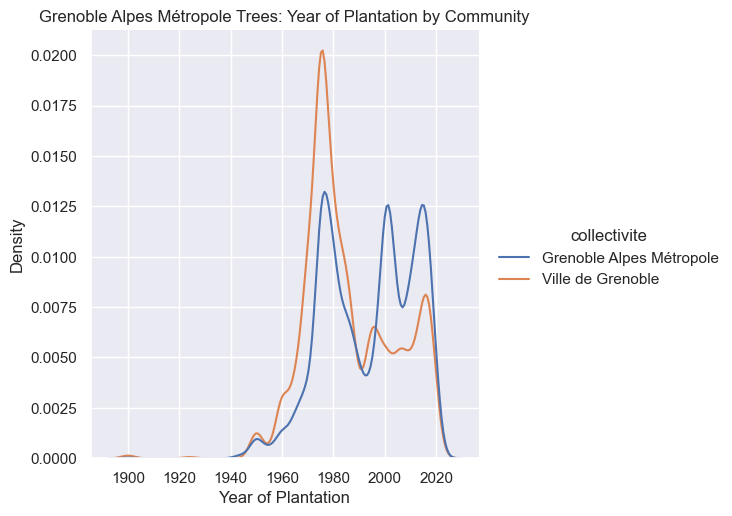

In [17]:
sns.displot(data=df, kind="kde", x="anneedeplantation", hue="collectivite")
plt.xlabel("Year of Plantation")
plt.title("Grenoble Alpes Métropole Trees: Year of Plantation by Community")

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by City Structure')

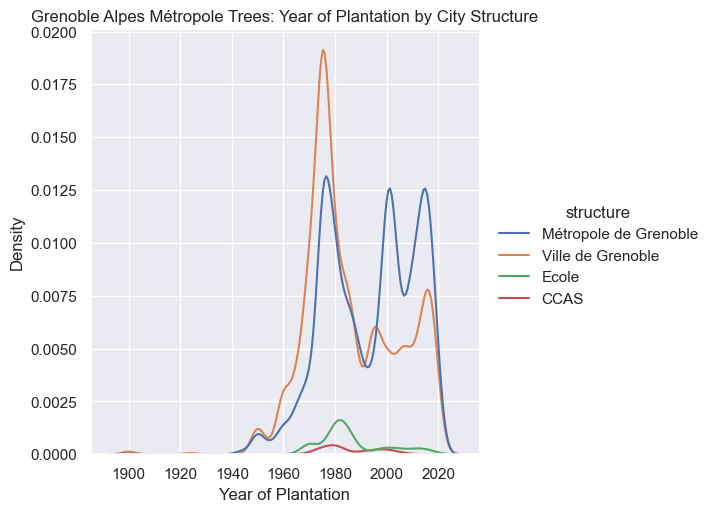

In [18]:
sns.displot(data=df, kind="kde", x="anneedeplantation", hue="structure")
plt.xlabel("Year of Plantation")
plt.title("Grenoble Alpes Métropole Trees: Year of Plantation by City Structure")

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by Tree Development Stage')

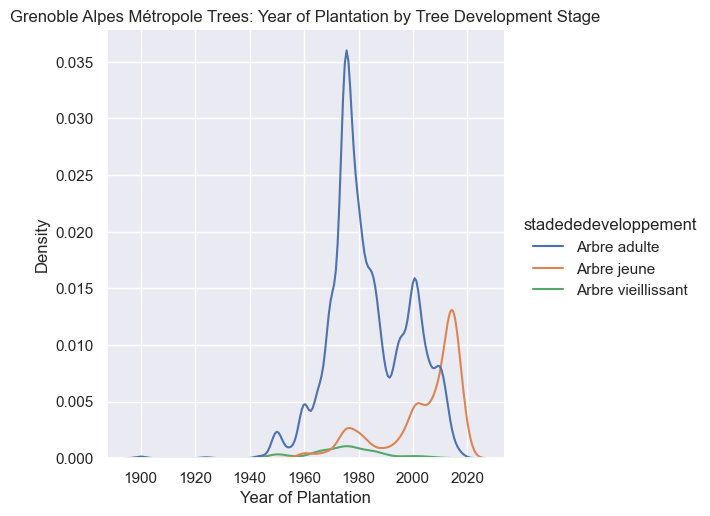

In [19]:
sns.displot(data=df, kind="kde", x="anneedeplantation", hue="stadededeveloppement")
plt.xlabel("Year of Plantation")
plt.title("Grenoble Alpes Métropole Trees: Year of Plantation by Tree Development Stage")

Text(0.5, 1.0, 'Grenoble Alpes Métropole Trees: Year of Plantation by Height')

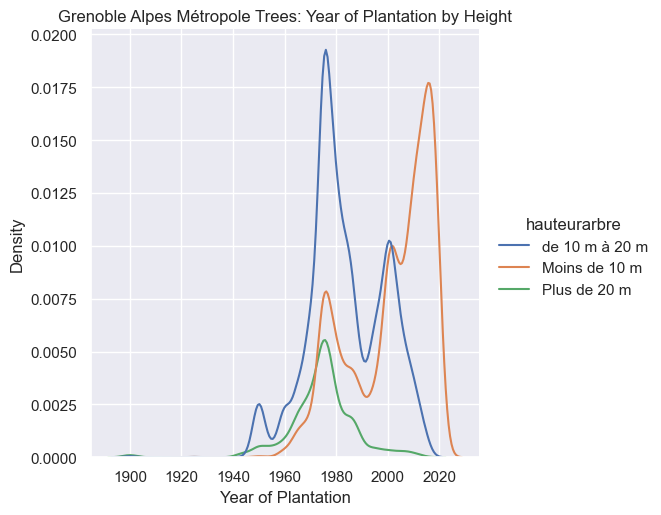

In [20]:
sns.displot(data=df, kind="kde", x="anneedeplantation", hue="hauteurarbre")
plt.xlabel("Year of Plantation")
plt.title("Grenoble Alpes Métropole Trees: Year of Plantation by Height")

<span style="color:Orange">

## Multivariate Analysis
</span>

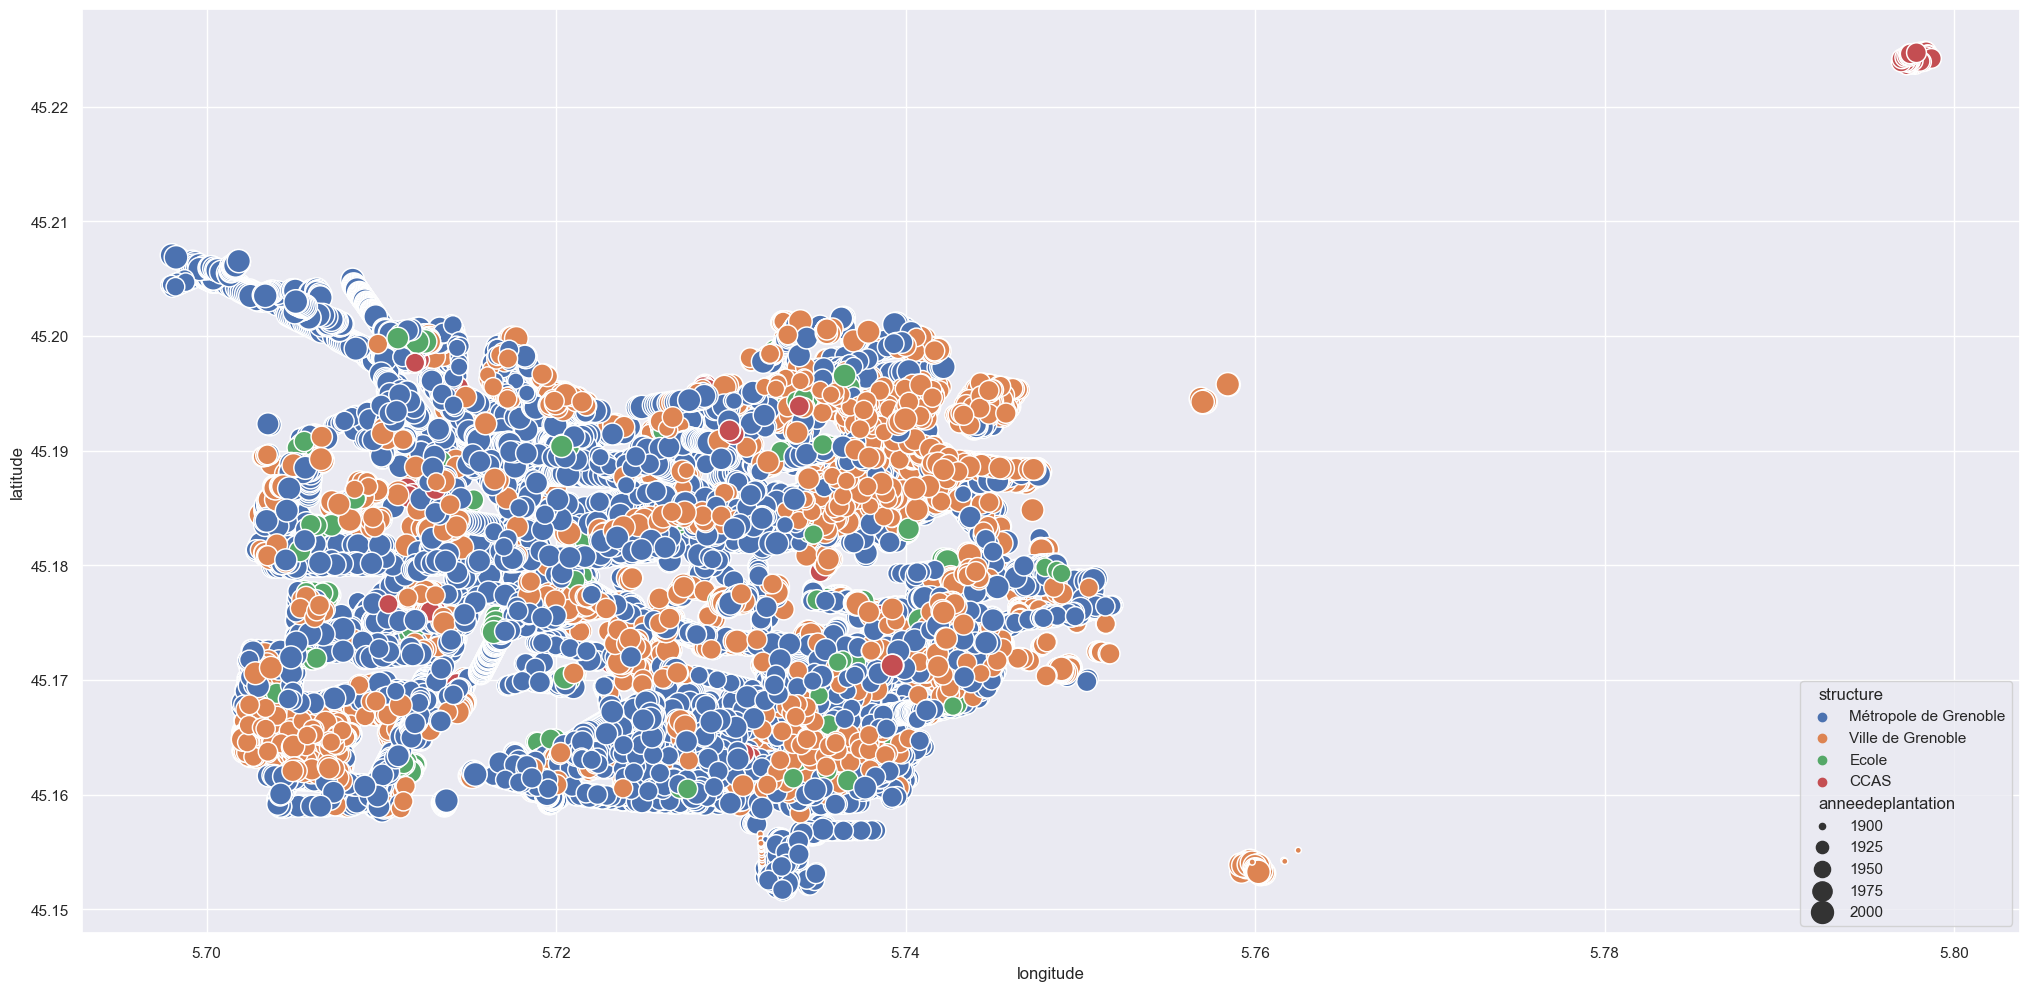

In [21]:
sns.scatterplot(data=df,
                x="longitude", y="latitude", 
                hue="structure",
                size="anneedeplantation", sizes=(20,300))
plt.title='Grenoble Alpes Métropole Trees: Year of Plantation, Geolocation and Structure',

In [22]:
fig = px.scatter(df, x='longitude', y='latitude', 
                 color='structure', 
                 size='anneedeplantation',
                 title='Grenoble Alpes Métropole Trees: Year of Plantation, Geolocation and Structure',
                 width=800, height=700
)
fig.show()